#  Summer Research \# 5
## Implimentation to QTT

#### Executive Summary
** Insert Executive Summary Here **

### Chebyshev Basis functions

In [11]:
#from setup.configs import *
import numpy as np
import quimb.tensor as qtn
# import helper_quimb as helper
# from axis import Axis
# import axis_map
# from basis.basis import Basis
import numpy.linalg as npla
import matplotlib.pyplot as plt
import scipy as sp
import scipy.linalg as spla
import scipy.sparse as sps
from scipy import special
from sympy import Symbol
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt

#if TYPE_CHECKING:
#    from axis import Axis

In [12]:
np.random.seed(12345)

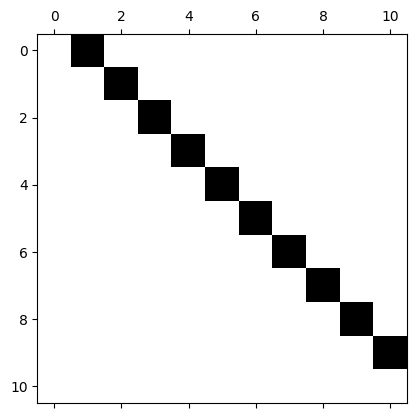

In [13]:
ms = np.linspace(-np.pi ,np.pi, 10)
mat = np.diag( 2 * ms, k=1) 
plt.spy(mat)
plt.show()

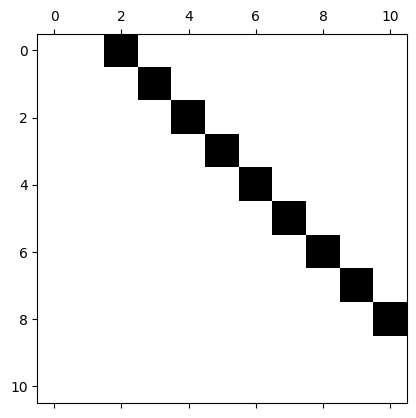

In [14]:
mat2 = np.dot(mat, mat)
plt.spy(mat2)
plt.show()

In [15]:
n = 10
ex = np.ones(n)

A = np.diag(ex, k=0) + np.diag(-1*ex[2:],k=2)
A[0,0] *= 2

print(A)

[[ 2.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [16]:
B = np.diag(np.arange(2,2*n,2), k=1)
#B = B[:-1,:]
print(B)

[[ 0  2  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0]
 [ 0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0 18]
 [ 0  0  0  0  0  0  0  0  0  0]]


In [17]:
Ai = npla.inv(A)
E = Ai @ B

print(E)

[[ 0.  1.  0.  3.  0.  5.  0.  7.  0.  9.]
 [ 0.  0.  4.  0.  8.  0. 12.  0. 16.  0.]
 [ 0.  0.  0.  6.  0. 10.  0. 14.  0. 18.]
 [ 0.  0.  0.  0.  8.  0. 12.  0. 16.  0.]
 [ 0.  0.  0.  0.  0. 10.  0. 14.  0. 18.]
 [ 0.  0.  0.  0.  0.  0. 12.  0. 16.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 14.  0. 18.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 16.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 18.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [18]:
E2 = E@E
print(E2)

[[  0.   0.   4.   0.  32.   0. 108.   0. 256.   0.]
 [  0.   0.   0.  24.   0. 120.   0. 336.   0. 720.]
 [  0.   0.   0.   0.  48.   0. 192.   0. 480.   0.]
 [  0.   0.   0.   0.   0.  80.   0. 280.   0. 648.]
 [  0.   0.   0.   0.   0.   0. 120.   0. 384.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 168.   0. 504.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 224.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. 288.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


In [19]:
mat = np.zeros((n,n))
mat[0,1::2] = np.arange(1,n,2)
for i in range(1,n-1):
    mat[i, i+1::2] = np.arange(2*(i+1),2*n-1,4)

mat

array([[ 0.,  1.,  0.,  3.,  0.,  5.,  0.,  7.,  0.,  9.],
       [ 0.,  0.,  4.,  0.,  8.,  0., 12.,  0., 16.,  0.],
       [ 0.,  0.,  0.,  6.,  0., 10.,  0., 14.,  0., 18.],
       [ 0.,  0.,  0.,  0.,  8.,  0., 12.,  0., 16.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 10.,  0., 14.,  0., 18.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 12.,  0., 16.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  0., 18.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 18.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [55]:
mat = np.zeros((n,n))

mat[0,2::2] = 0.5 * np.arange(2,n,2)**3
for i in range(1,n-2):
    for j in range(i+2,n,2):
        mat[i,j] = j*(j**2 - i**2)

mat

array([[  0.,   0.,   4.,   0.,  32.,   0., 108.,   0., 256.,   0.],
       [  0.,   0.,   0.,  24.,   0., 120.,   0., 336.,   0., 720.],
       [  0.,   0.,   0.,   0.,  48.,   0., 192.,   0., 480.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  80.,   0., 280.,   0., 648.],
       [  0.,   0.,   0.,   0.,   0.,   0., 120.,   0., 384.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., 168.,   0., 504.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 224.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 288.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [20]:
ms = np.arange(10)
m2 = mat.dot(mat.dot(ms))
m2

array([2832., 9504., 5184., 8192., 3792., 5712., 1792., 2592.,    0.,
          0.])

In [21]:
E2ms = E2.dot(ms)
E2ms

array([2832., 9504., 5184., 8192., 3792., 5712., 1792., 2592.,    0.,
          0.])

In [22]:
m2at = mat @ (mat @ ms)
m2at

array([2832., 9504., 5184., 8192., 3792., 5712., 1792., 2592.,    0.,
          0.])

In [26]:
D = Matrix(n, n, lambda i,j : (i+1) * int(i==j-1))
D

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 8, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 9],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [36]:
x = Symbol('x')
#M = eye(3) * x
S = Matrix(n, n, lambda i,j : 1/(2) * int(i==j)) + Matrix(n, n, lambda i,j : -1/2 * int(i==j -2))
S[0,0] *=2
S.inv()

Matrix([
[1.0,   0, 1.0,   0, 1.0,   0, 1.0,   0, 1.0,   0],
[  0, 2.0,   0, 2.0,   0, 2.0,   0, 2.0,   0, 2.0],
[  0,   0, 2.0,   0, 2.0,   0, 2.0,   0, 2.0,   0],
[  0,   0,   0, 2.0,   0, 2.0,   0, 2.0,   0, 2.0],
[  0,   0,   0,   0, 2.0,   0, 2.0,   0, 2.0,   0],
[  0,   0,   0,   0,   0, 2.0,   0, 2.0,   0, 2.0],
[  0,   0,   0,   0,   0,   0, 2.0,   0, 2.0,   0],
[  0,   0,   0,   0,   0,   0,   0, 2.0,   0, 2.0],
[  0,   0,   0,   0,   0,   0,   0,   0, 2.0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0, 2.0]])

In [39]:
S.inv() * D * S.inv() * D

Matrix([
[0, 0, 4.0,    0, 32.0,     0, 108.0,     0, 256.0,     0],
[0, 0,   0, 24.0,    0, 120.0,     0, 336.0,     0, 720.0],
[0, 0,   0,    0, 48.0,     0, 192.0,     0, 480.0,     0],
[0, 0,   0,    0,    0,  80.0,     0, 280.0,     0, 648.0],
[0, 0,   0,    0,    0,     0, 120.0,     0, 384.0,     0],
[0, 0,   0,    0,    0,     0,     0, 168.0,     0, 504.0],
[0, 0,   0,    0,    0,     0,     0,     0, 224.0,     0],
[0, 0,   0,    0,    0,     0,     0,     0,     0, 288.0],
[0, 0,   0,    0,    0,     0,     0,     0,     0,     0],
[0, 0,   0,    0,    0,     0,     0,     0,     0,     0]])

### Gegenbauer

In [17]:
lam = 1.5
ilam = int(lam)
n = 6
D = 2 ** (lam - 1) * sp.special.factorial(lam-1)* np.diag(np.arange(n-ilam) + lam, k=ilam)

S = np.diag(lam / (lam + np.arange(n))) + np.diag(-lam/(lam+2 + np.arange(n-2)), k=2)
S

array([[ 1.        ,  0.        , -0.42857143,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.6       ,  0.        , -0.33333333,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.42857143,  0.        , -0.27272727,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.33333333,  0.        ,
        -0.23076923],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.27272727,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.23076923]])

In [75]:
x = Symbol('x')
#M = eye(3) * x
S = Matrix(n, n, lambda i,j : x/(x+i) * int(i==j)) + Matrix(n, n, lambda i,j : -x/(x+i+2) * int(i==j -2))
S.inv()

Matrix([
[1,         0,         1,         0,         1,         0],
[0, (x + 1)/x,         0, (x + 1)/x,         0, (x + 1)/x],
[0,         0, (x + 2)/x,         0, (x + 2)/x,         0],
[0,         0,         0, (x + 3)/x,         0, (x + 3)/x],
[0,         0,         0,         0,   1 + 4/x,         0],
[0,         0,         0,         0,         0,   1 + 5/x]])

In [107]:
D = Matrix(n, n, lambda i,j : (x+i) * int(i==j-1))
D

Matrix([
[0, x,     0,     0,     0,     0],
[0, 0, x + 1,     0,     0,     0],
[0, 0,     0, x + 2,     0,     0],
[0, 0,     0,     0, x + 3,     0],
[0, 0,     0,     0,     0, x + 4],
[0, 0,     0,     0,     0,     0]])

In [108]:
S.inv()*D

Matrix([
[0, x,            0,        x + 2,                 0,             x + 4],
[0, 0, (x + 1)**2/x,            0, (x + 1)*(x + 3)/x,                 0],
[0, 0,            0, (x + 2)**2/x,                 0, (x + 2)*(x + 4)/x],
[0, 0,            0,            0,      (x + 3)**2/x,                 0],
[0, 0,            0,            0,                 0, (1 + 4/x)*(x + 4)],
[0, 0,            0,            0,                 0,                 0]])

In [192]:
n = 8
lam = 3
mat = np.zeros((n,n))
#mat[0,lam::2] = np.arange(lam,n,2)
for i in range(n-1):
    mat[i, i+lam::2] = (lam + i)/ lam *np.arange((i+lam),n,2)# * self.x_scale

In [193]:
mat

array([[ 0.        ,  0.        ,  0.        ,  3.        ,  0.        ,
         5.        ,  0.        ,  7.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  5.33333333,
         0.        ,  8.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         8.33333333,  0.        , 11.66666667],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 12.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 16.33333333],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [21]:
n = 5
alp = 2.0

S =  np.array([np.append([0,0],(-alp/(alp+2 + np.arange(n-2)))), np.zeros(n), (alp / (alp + np.arange(n))) ])
S

array([[ 0.        ,  0.        , -0.5       , -0.4       , -0.33333333],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.66666667,  0.5       ,  0.4       ,  0.33333333]])